#### The goal is to predict the survival of passengers travelling in RMS Titanic using Decision Tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/titanic.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
df.drop(['Cabin'],axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.Embarked.mode()[0]

'S'

In [9]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

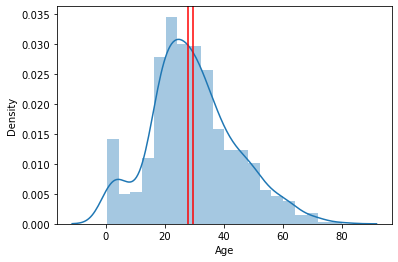

In [11]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='r')
plt.axvline(df.Age.median(), color='r')
plt.show()

In [12]:
df.Age.mean()

29.69911764705882

In [13]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Engineering

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
df.SibSp.value_counts(normalize=True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [17]:
df.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
df.Parch.value_counts(normalize=True)*100

0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [19]:
df['FamilySize'] = df.SibSp + df.Parch + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [20]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,29.699118,0,0,330919,7.8292,Q,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.000000,1,1,237789,30.0000,S,3
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.000000,0,0,347064,7.7500,S,1
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,29.699118,0,0,113767,50.0000,S,1


In [21]:
df['GenderClass'] = df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [22]:
df.shape

(891, 13)

# Dummification

It uses __One Hot Encoding Technique__.

It is achieved using the get_dummies() method of pandas.

https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [23]:
df = pd.get_dummies(df, columns=['GenderClass','Embarked'], drop_first=True)
df.shape

(891, 15)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,1,0,1


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'GenderClass_female',
       'GenderClass_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [26]:
df.drop(['Name', 'Sex','Ticket','PassengerId','SibSp','Parch'], axis=1, inplace=True)

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'GenderClass_female',
       'GenderClass_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


In [29]:
df.describe()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602,0.308642,0.603816,0.086420,0.725028
std,0.486592,0.836071,13.002015,49.693429,1.613459,0.462192,0.489378,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000


# Preparing X and y

In [30]:
X = df.loc[ : , df.columns != 'Survived' ]
X.head()

,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,1,0,0,0
2,3,26.0,7.9250,1,1,0,0,1
3,1,35.0,53.1000,2,1,0,0,1
4,3,35.0,8.0500,1,0,1,0,1


In [31]:
y = df.Survived

In [32]:
X.shape

(891, 8)

# Splitting X and y into Training and Testing datasets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


# Decision Tree Classifier

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
model

DecisionTreeClassifier(random_state=0)

# Predictions

In [37]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation

In [38]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9873595505617978


Testing Accuracy:  0.7821229050279329


In [39]:
from sklearn.metrics import confusion_matrix
print("Training confusion_matrix:\n",confusion_matrix(y_train, y_pred_train))
print("\n\nTesting confusion_matrix:\n",confusion_matrix(y_test, y_pred_test))

Training confusion_matrix:
 [[442   1]
 [  8 261]]


Testing confusion_matrix:
 [[91 15]
 [24 49]]


In [40]:
from sklearn.metrics import precision_score
print("Training precision_score: ",precision_score(y_train, y_pred_train))
print("\n\nTesting precision_score: ",precision_score(y_test, y_pred_test))

Training precision_score:  0.9961832061068703


Testing precision_score:  0.765625


In [41]:
from sklearn.metrics import recall_score
print("Training recall_score: ",recall_score(y_train, y_pred_train))
print("\n\nTesting recall_score: ",recall_score(y_test, y_pred_test))

Training recall_score:  0.9702602230483272


Testing recall_score:  0.6712328767123288


In [42]:
from sklearn.metrics import f1_score
print("Training f1_score: ",f1_score(y_train, y_pred_train))
print("\n\nTesting f1_score: ",f1_score(y_test, y_pred_test))

Training f1_score:  0.983050847457627


Testing f1_score:  0.7153284671532847


In [43]:
from sklearn.metrics import classification_report
print("Training classification_report:\n",classification_report(y_train, y_pred_train))
print("\n\nTesting classification_report:\n",classification_report(y_test, y_pred_test))

Training classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       443
           1       1.00      0.97      0.98       269

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712



Testing classification_report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       106
           1       0.77      0.67      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



# GridSearchCV - First time

In [44]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,None]
}
param_dist

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}

In [45]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid= param_dist, cv=10, n_jobs=-1)

# https://miro.medium.com/max/1838/1*AAwIlHM8TpAVe4l2FihNUQ.png

In [46]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [47]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [48]:
grid.best_score_

0.8358176838810643

In [49]:
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

In [50]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.8384831460674157


Testing Accuracy:  0.8044692737430168


# GridSearchCV - Second time

In [51]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['sqrt','log2', None]
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['sqrt', 'log2', None]}

In [52]:
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(model, param_grid= param_dist, cv=10, n_jobs=-1)

In [53]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 60),
                         'max_features': ['sqrt', 'log2', None]})

In [54]:
grid2.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': None}

In [55]:
grid2.best_score_

0.8358176838810643

In [56]:
y_pred_train = grid2.predict(X_train)
y_pred_test = grid2.predict(X_test)

In [57]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.8384831460674157


Testing Accuracy:  0.8044692737430168


# Polynomial Regression additional Reading

>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

>https://www.javatpoint.com/machine-learning-polynomial-regression

# Additional Readings:

>https://www.mygreatlearning.com/blog/gridsearchcv/

>https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

>https://machinelearningknowledge.ai/hyperparameter-tuning-with-sklearn-gridsearchcv-and-randomizedsearchcv/

# Happy Learning

# Random Forest Algorithm

In [58]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [59]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [60]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9873595505617978


Testing Accuracy:  0.7653631284916201


# GridSearchCV - First time

In [61]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['sqrt','log2', None]
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['sqrt', 'log2', None]}

In [62]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(clf, param_grid= param_dist, cv=10, n_jobs=-1)

In [63]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 60),
                         'max_features': ['sqrt', 'log2', None]})

In [54]:
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': None}

In [55]:
grid_clf.best_score_

0.8358176838810643

In [64]:
y_pred_train = grid_clf.predict(X_train)
y_pred_test = grid_clf.predict(X_test)

In [65]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.8806179775280899


Testing Accuracy:  0.7877094972067039


# GridSearchCV - Second time

In [66]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['sqrt','log2', None]
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['sqrt', 'log2', None]}

In [67]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(RandomForestClassifier(n_estimators=20, random_state=0), param_grid= param_dist, cv=10, n_jobs=-1)

In [68]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 60),
                         'max_features': ['sqrt', 'log2', None]})

In [69]:
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

In [70]:
grid_clf.best_score_

0.8455594679186229

In [71]:
y_pred_train = grid_clf.predict(X_train)
y_pred_test = grid_clf.predict(X_test)

In [72]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.8918539325842697


Testing Accuracy:  0.7821229050279329


# RandomizedSearchCV - Third time

In [96]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,60),
    'max_features' : ['sqrt','log2', None]
}
param_dist

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 60),
 'max_features': ['sqrt', 'log2', None]}

In [97]:
from sklearn.model_selection import RandomizedSearchCV
grid_clf = RandomizedSearchCV(RandomForestClassifier(n_estimators=300, random_state=0), param_dist, cv=10, n_jobs=-1, random_state=0, n_iter=50)

In [98]:
grid_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 60),
                                        'max_features': ['sqrt', 'log2', None]},
                   random_state=0)

In [99]:
grid_clf.best_params_

{'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini'}

In [100]:
grid_clf.best_score_

0.8455594679186229

In [101]:
y_pred_train = grid_clf.predict(X_train)
y_pred_test = grid_clf.predict(X_test)

In [102]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9073033707865169


Testing Accuracy:  0.7821229050279329


# Happy Learning